# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

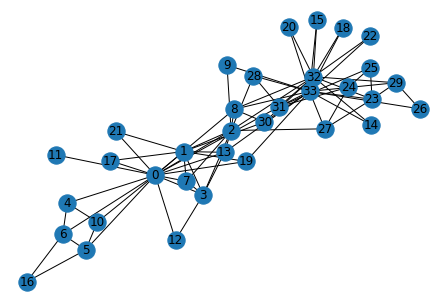

In [3]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)  
问题1：空手道俱乐部网络的平均度是多少?

In [4]:
def average_degree(num_edges, num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of
    # the graph. Round the result to nearest integer (for example
    # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

    avg_degree = 0

    ############# Your code here ############
    count_degree = num_edges * 2
    avg_degree = int(round(count_degree / num_nodes))
    #########################################

    return avg_degree


num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)
问题2：空手道俱乐部网络的平均聚类系数是多少?

In [5]:
def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0

    ############# Your code here ############
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function
    avg_cluster_coef = nx.average_clustering(G)
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################

    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$  
$$
r_j=\beta\sum_{i\rightarrow j}\frac{r_i}{d_i}+(1-\beta)\frac 1N
$$
- $\beta$ 继续随机游走的概率
- $1-\beta$ 跳转到随机的节点的概率
- $N$ 所有节点的个数

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0

    ############# Your code here ############
    ## Note: 
    ## 1: You should not use nx.pagerank
    N = G.number_of_nodes()

    for node_neighbor in G.neighbors(node_id):
        node_deg = G.degree[node_neighbor]
        # Notice that all nodes share the same PageRank value r0 at the first iteration
        r1 += beta * r0/node_deg + (1-beta)*1/N
    
    r1 = round(r1, 2)
    #########################################

    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.22


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)
问题4：空手道俱乐部网络节点5的邻近中心度是多少?  
The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$  

In [7]:
def closeness_centrality(G, node=5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0

    ## Note:
    ## 1: You can use networkx closeness centrality function.
    ## 2: Notice that networkx closeness centrality returns the normalized 
    ## closeness directly, which is different from the raw (unnormalized) 
    ## one that we learned in the lecture.

    #########################################
    # Normalized version from NetworkX
    # closeness = nx.closeness_centrality(G, node)
    
    # Raw version following above equation
    # source: https://stackoverflow.com/questions/31764515/find-all-nodes-connected-to-n
    path_length_total = 0 
    for path in list(nx.single_source_shortest_path(G,node).values())[1:]:
        path_length_total += len(path)-1

    closeness = 1 / path_length_total
    closeness = round(closeness, 2)

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [8]:
import torch
print(torch.__version__)

1.6.0


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [9]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.8350, 0.1902, 0.0988, 0.0284],
        [0.8526, 0.6396, 0.9353, 0.0425],
        [0.4298, 0.9820, 0.6256, 0.0281]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)
问题5：获取空手道俱乐部网络的边列表，并将其转化为`torch.LongTensor`。`pos_edge_index`向量的`torch.sum`是多少?(10分)

In [11]:
import numpy as np

In [12]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [13]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.

    edge_list = []

    ############# Your code here ############
    edge_list = list(G.edges())

    #########################################

    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].

    edge_index = torch.tensor([])

    ############# Your code here ############
    edge_index = torch.tensor(np.array(edge_list), dtype=torch.long)
    edge_index = edge_index.T
                         
    #########################################

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)
问题6：完成下面的负采样边的函数。之后再问答哪些边（比如1->5）是跆拳道俱乐部的负样本?(10分)

In [14]:
import random


def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation
    # works on the karate club network. In this implementation, self loop should
    # not be considered as either a positive or negative edge. Also, notice that
    # the karate club network is an undirected graph, if (0, 1) is a positive
    # edge, do you think (1, 0) can be a negative one?

    neg_edge_list = []

    pos_set = set(G.edges())
    visited_set = set()

    ############# Your code here ############
    node_list = list(G.nodes())
    random.shuffle(node_list)

    for n_i in node_list:
        for n_j in node_list:
            if n_i == n_j \
                    or (n_i, n_j) in pos_set or (n_j, n_i) in pos_set \
                    or (n_i, n_j) in visited_set or (n_j, n_i) is visited_set:
                continue

            neg_edge_list.append((n_i, n_j))
            visited_set.add((n_i, n_j))
            visited_set.add((n_j, n_i))
            if len(neg_edge_list) == num_neg_samples:
                return neg_edge_list

    #########################################


# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
# Note:
# 1: For each of the 5 edges, print whether it can be negative edge


def is_neg_edge(edge):
    return not(edge in pos_edge_list or (edge[1], edge[0]) in pos_edge_list)


print(is_neg_edge(edge_1))
print(is_neg_edge(edge_2))
print(is_neg_edge(edge_3))
print(is_neg_edge(edge_4))
print(is_neg_edge(edge_5))


#########################################
neg_edge_index

The neg_edge_index tensor has shape torch.Size([2, 78])
False
True
False
False
True


tensor([[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
         23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  3,  3],
        [14,  3, 16, 31,  0, 19, 11, 15,  6,  7, 21,  5,  9,  1,  8, 26,  2, 13,
         12, 18, 22, 10,  4, 28, 20, 30, 17, 24,  3, 16, 31,  0, 19, 11, 15,  6,
          7, 29, 21,  5,  9,  1,  8, 27, 26,  2, 13, 12, 18, 22, 10,  4, 28, 20,
         30, 17, 24, 25, 16, 31, 19, 11, 15,  6, 29, 21,  5, 33,  9,  8, 27, 26,
         18, 22, 32, 10,  4, 28]])

# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.6.0


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [16]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [17]:
emb_sample.weight

Parameter containing:
tensor([[ 0.4363, -0.3275, -0.8873, -1.6045,  0.3074, -0.2530,  0.1804,  0.5210],
        [-0.3122,  0.4942, -0.1521,  2.2770, -0.8194,  0.5718, -0.4509,  0.2674],
        [-0.1244,  0.5129, -0.6050, -1.7743, -1.2465, -0.6302, -0.5309, -0.4078],
        [ 1.0460,  1.3251, -0.0644,  0.4349, -1.1477,  1.4812, -0.5835, -0.4225]],
       requires_grad=True)

We can select items from the embedding matrix, by using Tensor indices

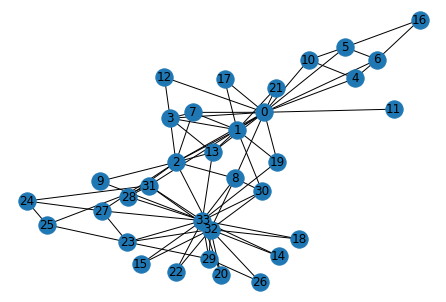

In [18]:
# Visualize the graph
nx.draw(G, with_labels = True)

In [19]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.3122,  0.4942, -0.1521,  2.2770, -0.8194,  0.5718, -0.4509,  0.2674]],
       grad_fn=<EmbeddingBackward>)
tensor([[-0.3122,  0.4942, -0.1521,  2.2770, -0.8194,  0.5718, -0.4509,  0.2674],
        [ 1.0460,  1.3251, -0.0644,  0.4349, -1.1477,  1.4812, -0.5835, -0.4225]],
       grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


Now, it's your time to create node embedding matrix for the graph we have!

现在，是时候为我们拥有的图创建节点嵌入矩阵了!  

- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [20]:
# Please do not change / reset the random seed
torch.manual_seed(1)


def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change
    # the values of num_node and embedding_dim. The weight matrix of returned
    # layer should be initialized under uniform distribution.

    emb = None

    ############# Your code here ############
    emb = nn.Embedding(num_nodes, embedding_dim)
    emb.weight.data = torch.rand(num_nodes, embedding_dim)

    #########################################

    return emb


emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


## Visualize the initial node embeddings  
可视化初始的节点嵌入  
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

In [21]:
for node in G.nodes(data=True):
    print(node)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


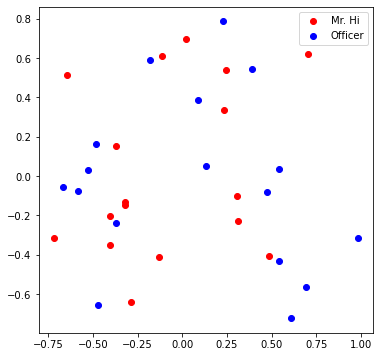

In [22]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()


# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)
问题7：训练嵌入!你能得到的最好的表现是什么?请在Gradescope上报告最好的损失和准确性。(20分)

In [23]:
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
train_edge

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
         23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31

In [24]:
from torch.optim import SGD


def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the
    # pred tensor (the resulting tensor after sigmoid) and the label
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places.
    # For example, accuracy 0.82956 will be rounded to 0.8296.

    accu = 0.0

    ############# Your code here ############
    pred = [1 if item > 0.5 else 0 for item in pred]
    num_match = (np.array(pred) == np.array(train_label)).sum()
    accu = num_match / len(train_label)
    accu = round(accu, 4)
    #########################################

    return accu


def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and
    # learning rate. In general, you need to implement:
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch
    # (as a sanity check, the loss should decrease during training)

    epochs = 500
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):

        ############# Your code here ############
        optimizer.zero_grad()

        # (1) Get the embeddings of the nodes in train_edge
        emb_set_u = emb(train_edge[0])
        emb_set_v = emb(train_edge[1])

        # (2) Dot product the embeddings between each node pair
        dot_prod = torch.sum(emb_set_u * emb_set_v, dim=-1)

        # (3) Feed the dot product result into sigmoid
        sig = sigmoid(dot_prod)

        # (4) Feed the sigmoid output into the loss_fn
        loss = loss_fn(sig, train_label)

        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

        print(f"Loss for Epoch {i}: {loss}")
        print(f"Accuracy for is Epoch {i}: {accuracy(sig, train_label)}")
        print()

    #########################################


loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Loss for Epoch 0: 2.2355992794036865
Accuracy for is Epoch 0: 0.5

Loss for Epoch 1: 2.19657826423645
Accuracy for is Epoch 1: 0.5

Loss for Epoch 2: 2.1232755184173584
Accuracy for is Epoch 2: 0.5

Loss for Epoch 3: 2.0206806659698486
Accuracy for is Epoch 3: 0.5

Loss for Epoch 4: 1.8939520120620728
Accuracy for is Epoch 4: 0.5

Loss for Epoch 5: 1.7483880519866943
Accuracy for is Epoch 5: 0.5

Loss for Epoch 6: 1.5894585847854614
Accuracy for is Epoch 6: 0.5

Loss for Epoch 7: 1.4228326082229614
Accuracy for is Epoch 7: 0.5

Loss for Epoch 8: 1.254340648651123
Accuracy for is Epoch 8: 0.5

Loss for Epoch 9: 1.0897903442382812
Accuracy for is Epoch 9: 0.5

Loss for Epoch 10: 0.9346003532409668
Accuracy for is Epoch 10: 0.5192

Loss for Epoch 11: 0.7933176755905151
Accuracy for is Epoch 11: 0.5962

Loss for Epoch 12: 0.6691997051239014
Accuracy for is Epoch 12: 0.6346

Loss for Epoch 13: 0.5640527606010437
Accuracy for is Epoch 13: 0.6859

Loss for Epoch 14: 0.47831109166145325
Accura

Accuracy for is Epoch 170: 0.9936

Loss for Epoch 171: 0.07117371261119843
Accuracy for is Epoch 171: 0.9936

Loss for Epoch 172: 0.07037559151649475
Accuracy for is Epoch 172: 0.9936

Loss for Epoch 173: 0.06958933919668198
Accuracy for is Epoch 173: 0.9936

Loss for Epoch 174: 0.06881478428840637
Accuracy for is Epoch 174: 0.9936

Loss for Epoch 175: 0.0680517628788948
Accuracy for is Epoch 175: 0.9936

Loss for Epoch 176: 0.06730010360479355
Accuracy for is Epoch 176: 0.9936

Loss for Epoch 177: 0.06655963510274887
Accuracy for is Epoch 177: 0.9936

Loss for Epoch 178: 0.06583018600940704
Accuracy for is Epoch 178: 0.9936

Loss for Epoch 179: 0.06511160731315613
Accuracy for is Epoch 179: 0.9936

Loss for Epoch 180: 0.06440369784832001
Accuracy for is Epoch 180: 0.9936

Loss for Epoch 181: 0.06370631605386734
Accuracy for is Epoch 181: 0.9936

Loss for Epoch 182: 0.0630192831158638
Accuracy for is Epoch 182: 0.9936

Loss for Epoch 183: 0.06234247237443924
Accuracy for is Epoch 183: 

Loss for Epoch 329: 0.02000933326780796
Accuracy for is Epoch 329: 1.0

Loss for Epoch 330: 0.019899481907486916
Accuracy for is Epoch 330: 1.0

Loss for Epoch 331: 0.019790662452578545
Accuracy for is Epoch 331: 1.0

Loss for Epoch 332: 0.01968284696340561
Accuracy for is Epoch 332: 1.0

Loss for Epoch 333: 0.01957602985203266
Accuracy for is Epoch 333: 1.0

Loss for Epoch 334: 0.019470207393169403
Accuracy for is Epoch 334: 1.0

Loss for Epoch 335: 0.019365357235074043
Accuracy for is Epoch 335: 1.0

Loss for Epoch 336: 0.01926145888864994
Accuracy for is Epoch 336: 1.0

Loss for Epoch 337: 0.019158512353897095
Accuracy for is Epoch 337: 1.0

Loss for Epoch 338: 0.019056497141718864
Accuracy for is Epoch 338: 1.0

Loss for Epoch 339: 0.018955426290631294
Accuracy for is Epoch 339: 1.0

Loss for Epoch 340: 0.018855249509215355
Accuracy for is Epoch 340: 1.0

Loss for Epoch 341: 0.018755991011857986
Accuracy for is Epoch 341: 1.0

Loss for Epoch 342: 0.018657606095075607
Accuracy for i

Accuracy for is Epoch 444: 1.0

Loss for Epoch 445: 0.011828531511127949
Accuracy for is Epoch 445: 1.0

Loss for Epoch 446: 0.011784304864704609
Accuracy for is Epoch 446: 1.0

Loss for Epoch 447: 0.011740356683731079
Accuracy for is Epoch 447: 1.0

Loss for Epoch 448: 0.011696698144078255
Accuracy for is Epoch 448: 1.0

Loss for Epoch 449: 0.011653327383100986
Accuracy for is Epoch 449: 1.0

Loss for Epoch 450: 0.011610237881541252
Accuracy for is Epoch 450: 1.0

Loss for Epoch 451: 0.011567437089979649
Accuracy for is Epoch 451: 1.0

Loss for Epoch 452: 0.011524902656674385
Accuracy for is Epoch 452: 1.0

Loss for Epoch 453: 0.011482641100883484
Accuracy for is Epoch 453: 1.0

Loss for Epoch 454: 0.011440658010542393
Accuracy for is Epoch 454: 1.0

Loss for Epoch 455: 0.011398941278457642
Accuracy for is Epoch 455: 1.0

Loss for Epoch 456: 0.011357499286532402
Accuracy for is Epoch 456: 1.0

Loss for Epoch 457: 0.011316312476992607
Accuracy for is Epoch 457: 1.0

Loss for Epoch 458:

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

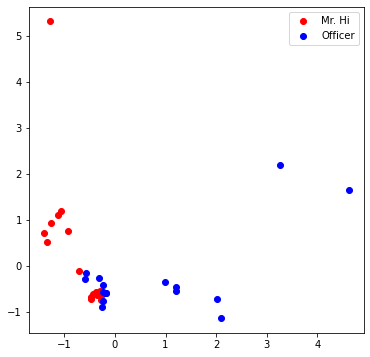

In [25]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.